**SERB - Karyashala sponsored one week workshop on Explainable AI: Theoretical Insights and Engineering Applications**

**Hands-on-Explainable-AI-using-LIME-Library**

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=173ea6e93b739fee66c536c715029ee42c07f029734f6631bfd2f63a92801445
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
iris=load_iris()
X=iris.data
y=iris.target
feature_names=iris.feature_names
class_names=iris.target_names
print("Feature names",feature_names)
print("Class name",class_names)

Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class name ['setosa' 'versicolor' 'virginica']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
 #choose an instance feom test set for explanation
instance_idx=10
instance=X_test[instance_idx]

pred_probs=model.predict_proba(instance.reshape(1,-1))

for class_idx,class_name in enumerate(class_names):
  print(f"predicted Probability for {class_name}:{pred_probs[0][class_idx]}")

predicted Probability for setosa:0.0
predicted Probability for versicolor:0.05
predicted Probability for virginica:0.95


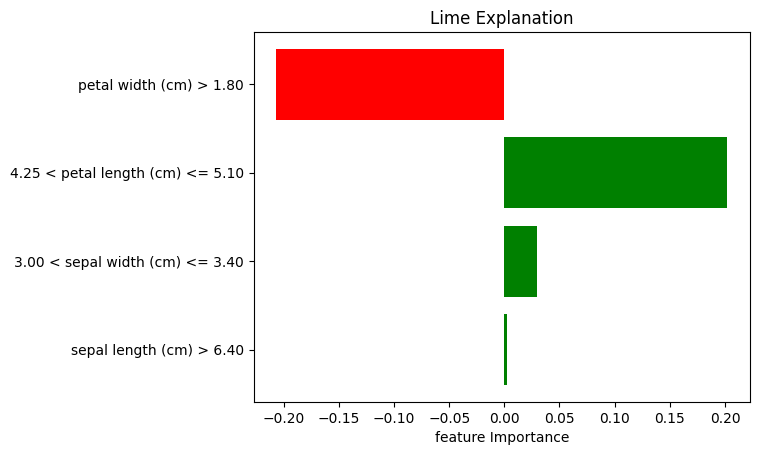

In [ ]:


explainer=lime.lime_tabular.LimeTabularExplainer(X_train,feature_names=feature_names,class_names=class_names)

explanation=explainer.explain_instance(instance,model.predict_proba,num_features=len(feature_names))

fig=explanation.as_pyplot_figure()
plt.title("Lime Explanation")
plt.xlabel("feature Importance")
plt.show()